## PROJETO MACHINE LEARNING - REGRESSÃO LINEAR

#### Analisando E-Commerce Customers (Clientes do Comércio Eletrônico)

In [1]:
# Importando as bibliotecas principais

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

### 1. Tratamento dos dados:

In [2]:
df = pd.read_csv("Ecommerce Customers.csv")
df.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [3]:
# Observando as informações de cada coluna e número de entradas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### 2. Análise e Visualização dos dados:

####  Features:

O dataset é composto por 8 tipos de variáveis:

As três primeiras colunas possuem informações pessoais dos clientes: 

|Coluna|Importância|
|-|-|
|Email| Endereço Eletrônico|
|Address| Endereço de localização do cliente|
|Avatar|Cor que indica o tipo de cliente|

Já as outras 5 colunas são informações numéricas:

|Coluna|Importância|
|-|-|
|Avg. Session Length| Média de sessões de aconselhamento para a loja|
|Time on App| Tempo médio gasto no aplicativo, em minutos|
|Time on Website| Tempo médio gasto no site, em minutos|
|Length of Membership| Tempo, em anos, que o cliente é membro|
|Yearly Amount Spent| Valor gasto pelo cliente anualmente|

In [4]:
# Descrição estatística das colunas:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


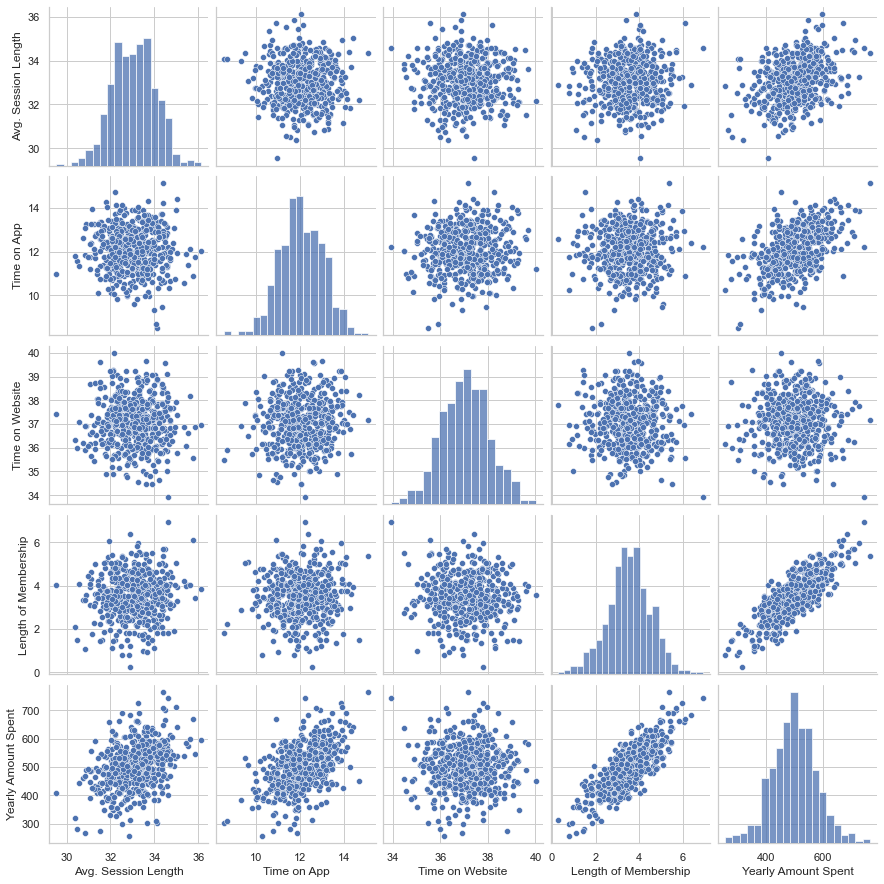

In [5]:
sns.pairplot(df)

* Criando um heatmap para verificar a correlação entre as features:

<AxesSubplot:>

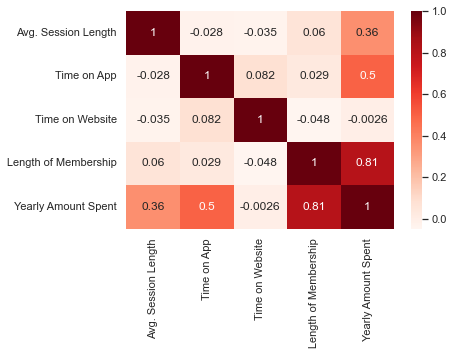

In [6]:
sns.heatmap(df.corr(),
            annot=True,
            cmap='Reds')

É importante observar a grande relação do gasto anual de clientes que são membros.

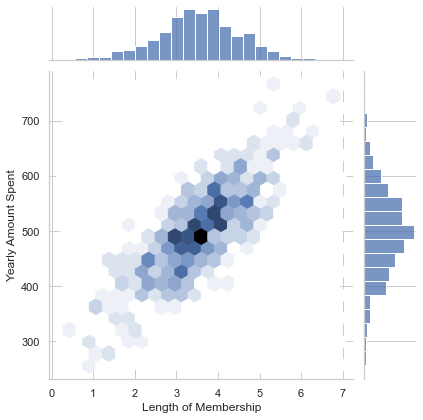

In [7]:
sns.jointplot(x=df["Length of Membership"],y=df["Yearly Amount Spent"],kind="hex")
plt.show()

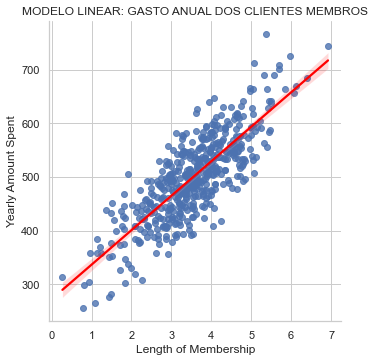

In [8]:
sns.lmplot(data=df,x="Length of Membership",y="Yearly Amount Spent", line_kws={'color': 'red'}) \
.set(title="MODELO LINEAR: GASTO ANUAL DOS CLIENTES MEMBROS")

* Com o gráfico de pontos, verificamos que há uma tendência, em que os clientes que mais usam o aplicativo costumam gastar mais anualmente. 

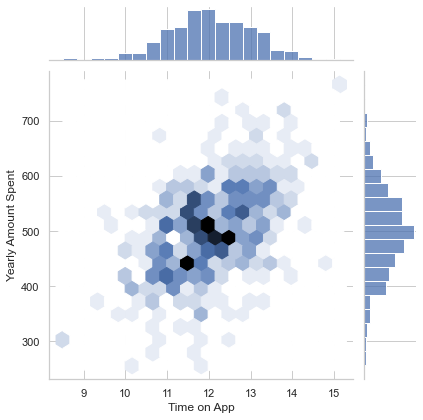

In [9]:
sns.jointplot(x=df["Time on App"],y=df["Yearly Amount Spent"],kind="hex")
plt.show()

* Criando um modelo linear do grafico acima:

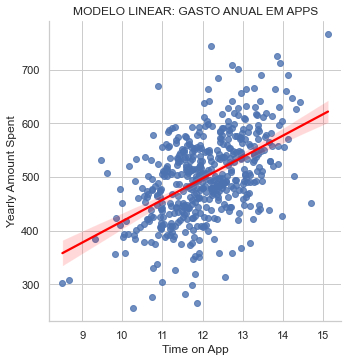

In [10]:
sns.lmplot(data=df,x="Time on App",y="Yearly Amount Spent", line_kws={'color': 'red'}) \
.set(title="MODELO LINEAR: GASTO ANUAL EM APPS")

* No grafico entre o tempo utilizado em sites e o valor gasto anualmente, não existe uma relação linear. 

Ou seja, as pessoas que gastam mais tempo nos Websites não costumam gastar mais.

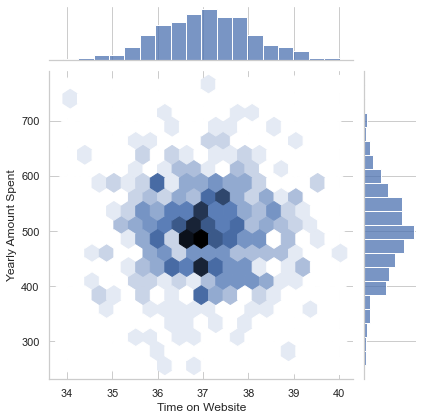

In [11]:
sns.jointplot(x=df["Time on Website"],y=df["Yearly Amount Spent"],kind="hex")
plt.show()

### 3. Criando o Modelo de Regressão Linear:

* Separando os dados em features e targets:

In [34]:
X = df[["Avg. Session Length","Time on App","Time on Website","Length of Membership"]]
y = df["Yearly Amount Spent"]

In [35]:
X.head(2)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034


In [36]:
y.head(2)

0    587.951054
1    392.204933
Name: Yearly Amount Spent, dtype: float64

* Dividindo os dados: 30% dados de teste/ 70% dados de treino:

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

* Instanciando o modelo linear:

In [38]:
from sklearn.linear_model import LinearRegression

LinearRegression = LinearRegression()

In [39]:
LinearRegression.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = LinearRegression.predict(X_test)
y_pred

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

In [41]:
for x in range(10):
    print("y Real: {} --- y Predito: {}".format(y_test.to_numpy()[x+1],
                                                y_pred[x+1]))

y Real: 534.7771880994133 --- y Predito: 542.5775628871679
y Real: 418.602742095224 --- y Predito: 427.06591658323146
y Real: 503.9783790525795 --- y Predito: 502.0246042542583
y Real: 410.06961105998295 --- y Predito: 410.1214355946547
y Real: 557.6082620533542 --- y Predito: 569.9344250807094
y Real: 538.941974531203 --- y Predito: 531.9343134107835
y Real: 514.3365582674007 --- y Predito: 506.29650969494514
y Real: 408.62018782983785 --- y Predito: 408.71870657951854
y Real: 475.0154070877503 --- y Predito: 473.97737104747193
y Real: 427.19938489532814 --- y Predito: 441.4691272584107


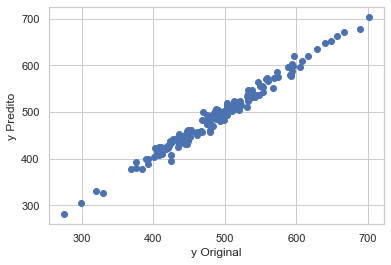

In [51]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel("y Original")
plt.ylabel("y Predito")

plt.show()

* Avaliação do Modelo com dados estatísticos:

In [52]:
from sklearn import metrics

In [89]:
print("Erro Médio Absoluto - MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("Erro Médio Quadrático - MSE:",metrics.mean_squared_error(y_test,y_pred))
print("Acurácia do modelo - R2:",round(metrics.r2_score(y_test,y_pred),3))


Erro Médio Absoluto - MAE: 8.4260916414321
Erro Médio Quadrático - MSE: 103.91554136503292
Acurácia do modelo - R2: 0.981


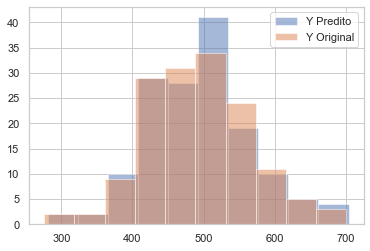

In [87]:
plt.hist(y_pred, alpha=0.5,label="Y Predito")
plt.hist(y_test, alpha=0.5,label="Y Original")
plt.legend(loc='upper right')
plt.show()